In [114]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [130]:
labels = loadmat('../data/raw/LabeledCaptions.mat')
print(labels.keys())

dict_keys(['__header__', '__version__', '__globals__', 'captions'])


In [147]:
captions = labels['captions']
print(captions[:,0])
print()
print(captions[:,5]).split('.jpg\' ')[0]

[ array([[ (array([ "Former U.N weapons inspector <IN> Scott Ritter </IN> prepares to address an anti-war rally in London's Hyde Park against a possible military strike on Iraq, September 28, 2002. Joint rally organizers Stop the War Coalition and the Muslim Association of Britain estimated at least 100,000 people participated in the march through London on Saturday in opposition to possible military action against Saddam Hussein's regime. REUTERS/Peter Macdiarmid"],
      dtype='<U447'), array(['2002/09/28/img_828.jpg'],
      dtype='<U22'), array([[array(['Scott Ritter'],
      dtype='<U12')]], dtype=object))]],
      dtype=[('caption', 'O'), ('picname', 'O'), ('names', 'O')])]

[ array([[ (array([ 'Aicha El Ouafi, mother of <IN> Zacarias Moussaoui </IN>, listens to questions from reporters after attending a hearing for her son at the Federal Courthouse complex in Alexandria, Virginia, July 25, 2002. Moussaoui withdrew his guilty plea to charges of conspiracy in connection with the S

AttributeError: 'NoneType' object has no attribute 'split'

<b>First collect training images from respective folders</b>

In [153]:
accum_imgs = []
for dirpath,_,filename in os.walk('../data/raw'):
     if any(f.endswith('.jpg') for f in filename):
        for f in filename:
             accum_imgs.append(os.path.join(dirpath, f))

In [154]:
len(accum_imgs)

5267

<b>Now we can analyse the images</b>

In [51]:
haarCascade = '../../opencv-3.3.1/data/haarcascades/haarcascade_frontalface_alt.xml'
faceDetector = cv2.CascadeClassifier(haarCascade)

In some cases the face detector works...

In [52]:
img = cv2.imread(accum_imgs[1])
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceDetector.detectMultiScale(img_grey, 1.3, 5)

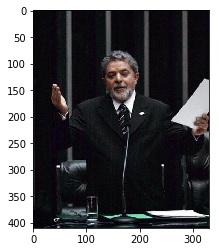

In [53]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [54]:
print(len(faces))

1


In [55]:
for (x,y,w,h) in faces:
    print(x,y,w,h)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

128 94 68 68


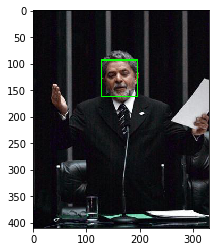

In [57]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

...but in others it does not

In [59]:
#for face in accum_imgs:
img = cv2.imread(accum_imgs[0])
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceDetector.detectMultiScale(img_grey, 1.3, 5)

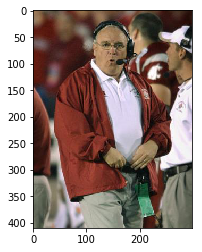

In [60]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [71]:
print(len(faces))

0


Check how often faces are correctly identified

In [112]:
shuffled = sorted(accum_imgs, key=lambda k: np.random.random())
idx = int(np.floor(0.8*len(shuffled)))
training_imgs = shuffled[0:idx]
test_imgs = shuffled[idx:]
print(len(training_imgs)+len(test_imgs))

5267


In [113]:
for im in training_imgs:
    img = cv2.imread(im)
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceDetector.detectMultiScale(img_grey, 1.3, 5)
    #LOG FACE LOCATIONS
    #COMAPRE TO MAT DATA FILE

KeyboardInterrupt: 